<a href="https://colab.research.google.com/github/gabrielsanchez/quantum-computing-wos-eda/blob/main/Quantum_computing_WoS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Computing WoS EDA
#### Gabriel Sanchez

In [1]:
!pip install pyBibX #  https://github.com/Valdecy/pyBibX
!pip install tabulate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.6/93.6 kB 750.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 19.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121

In [2]:
import numpy as np
import pandas as pd
import textwrap

from google.colab import data_table
from google.colab import files
from tabulate import tabulate
from prettytable import PrettyTable
from pyBibX.base import pbx_probe

In [3]:
file_name = 'savedrecsv2.bib'
database  = 'wos'
bibfile   = pbx_probe(file_bib = file_name, db = database, del_duplicated = True)

A Total of 495 Documents were Found ( 500 Documents and 5 Duplicates )

Article = 219
Article in Press = 7
Article; Book Chapter = 3
Editorial Material = 4
Proceedings Paper = 217
Review = 42
Review; Early Access = 3


In [4]:
report  = bibfile.eda_bib()
report

,Main Information,Results
0,Timespan,1997-2024
1,Total Number of Countries,60
2,Total Number of Institutions,582
3,Total Number of Sources,161
4,Total Number of References,16541
5,Total Number of Languages,4
6,--chinese (# of docs),2
7,--english (# of docs),490
8,--russian (# of docs),1
9,--spanish (# of docs),2


In [5]:
# Check Docs IDs
data_table.DataTable(bibfile.table_id_doc, num_rows_per_page = 5)

,ID,Document
0,0,"Owczarek, Robert (2016). Quantum mechanics for..."
1,1,"Ghosh, Sanjib and Nakajima, Kohei and Krisnand..."
2,2,"Claudino, Daniel and Lyakh, Dmitry I. and McCa..."
3,3,"Claudino, Daniel (2022). The basics of quantum..."
4,4,"Tang, Wei and Martonosi, Margaret and Jones, T..."
...,...,...
490,490,"Silva, Gabriel San Martin and Droguett, Enriqu..."
491,491,"Ramezani, Somayeh Bakhtiari and Sommers, Alexa..."
492,492,"Ciaramella, Giovanni and Iadarola, Giacomo and..."
493,493,"Shang, Honghui and Fan, Yi and Shen, Li and Gu..."


In [6]:
# Check Docs IDs per Type
data_table.DataTable(bibfile.id_doc_types(), num_rows_per_page = 15)

,Document Types,IDs
0,Article,"[2, 4, 5, 13, 15, 17, 21, 29, 32, 34, 35, 39, ..."
1,Article in Press,"[12, 127, 195, 244, 343, 397, 494]"
2,Article; Book Chapter,"[385, 412, 463]"
3,Editorial Material,"[174, 229, 260, 366]"
4,Proceedings Paper,"[0, 6, 7, 8, 9, 10, 11, 14, 16, 19, 20, 22, 23..."
5,Review,"[1, 3, 18, 24, 27, 53, 58, 63, 69, 72, 79, 86,..."
6,Review; Early Access,"[226, 250, 342]"


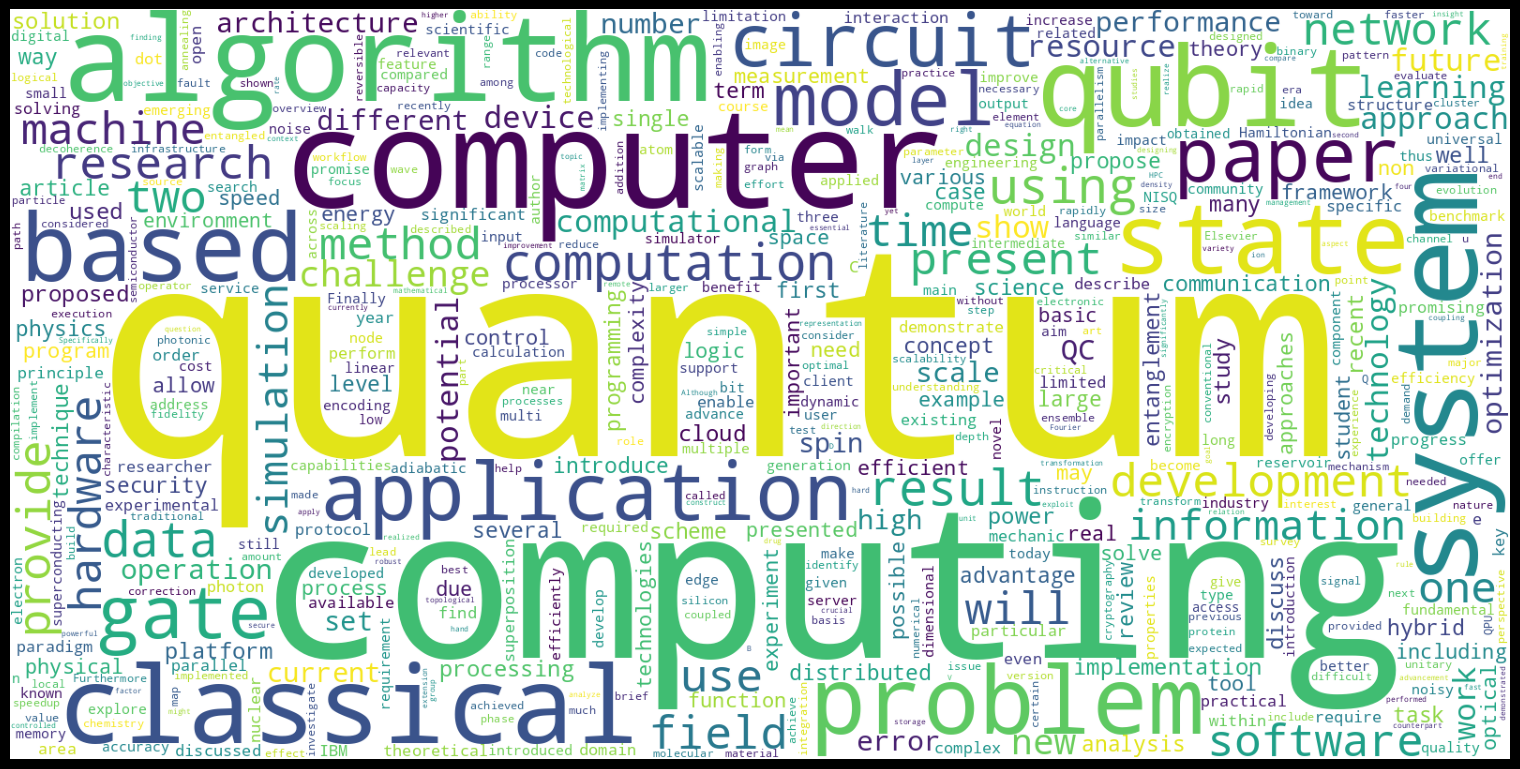

In [7]:
bibfile.word_cloud_plot(entry = 'abs', size_x = 15, size_y = 10, wordsn = 500)

In [11]:
# N-Grams
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwp', ngrams = 2, stop_words = [], rmv_custom_words = [], wordsn = 15)

## Journals

Evolution of publications by journal.

In [18]:
bibfile.plot_evolution_year(view             = 'notebook',
                            stop_words       = ['en'],
                            rmv_custom_words = [],
                            key              = 'jou',
                            topn             = 10,
                            txt_font_size    = 12,
                            start            = 2019,
                            end              = 2024)

## Sankey Diagram

Country -> Institution

In [22]:
bibfile.sankey_diagram(view = 'notebook', entry = ['cout', 'inst'], topn = 50)

## Tree Map: Journals

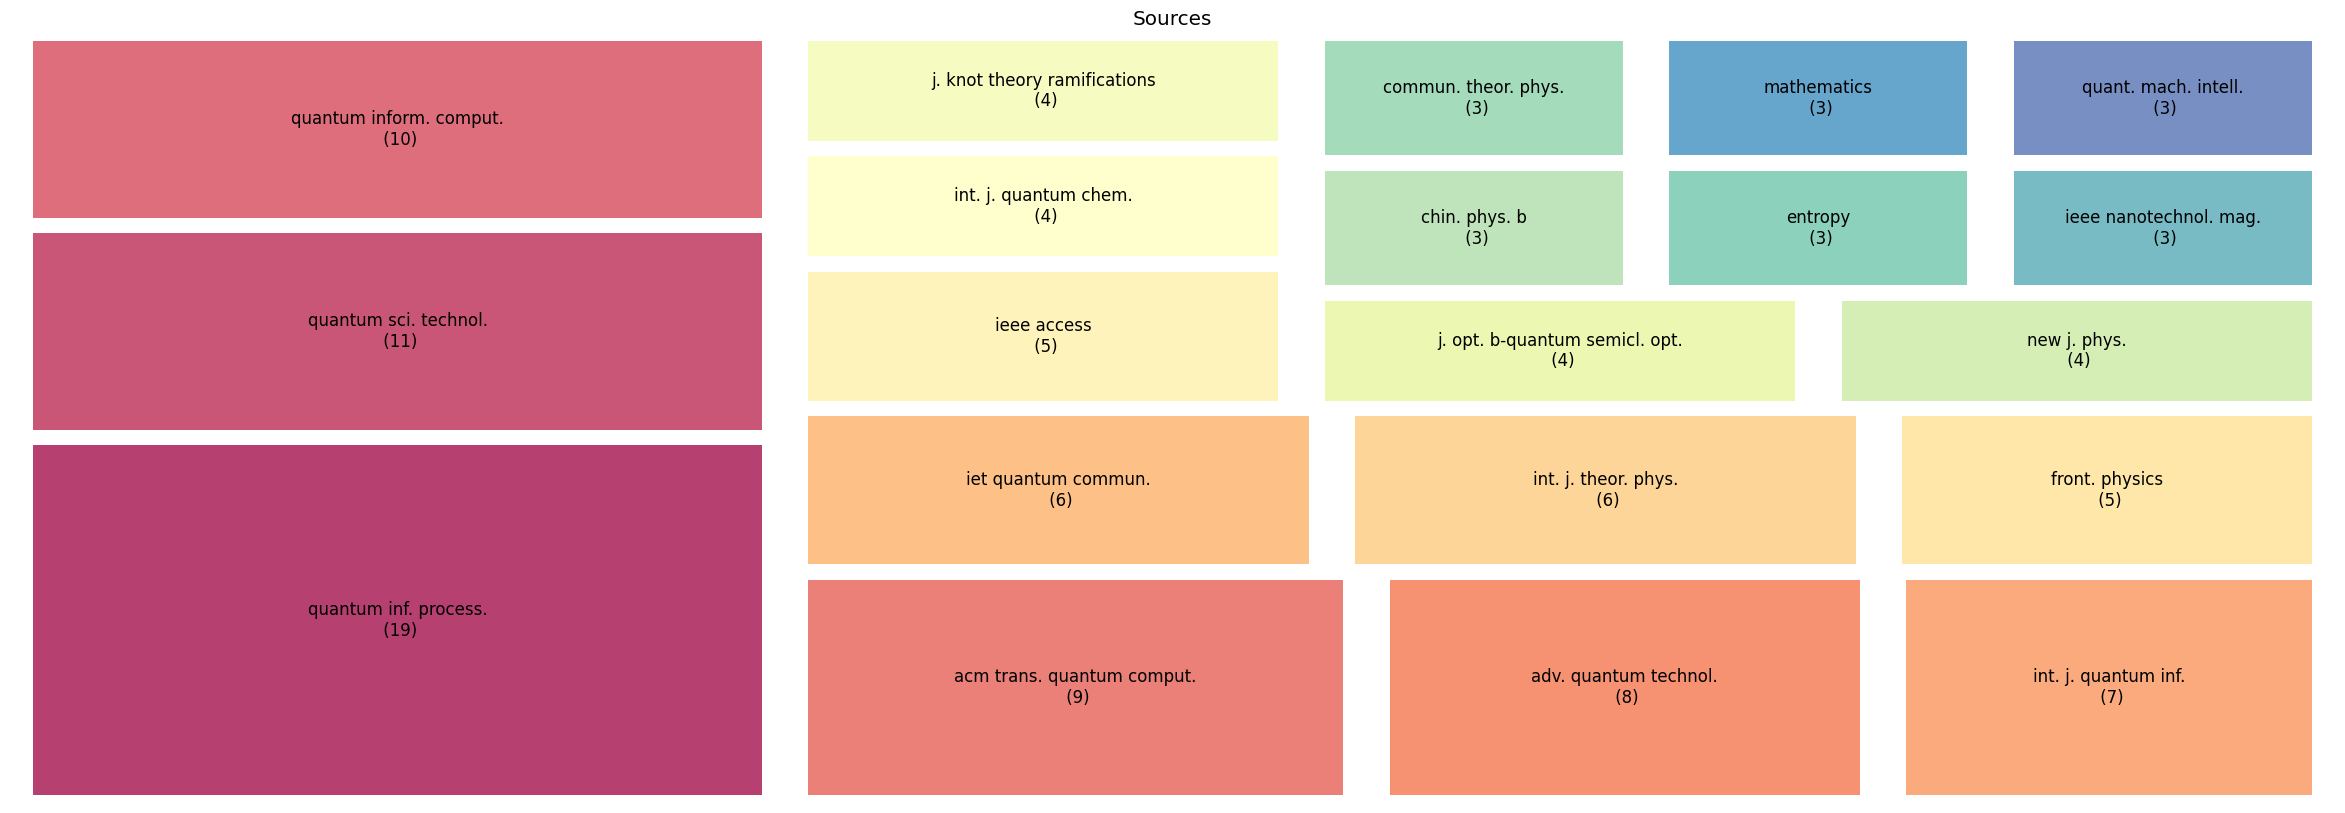

In [26]:
bibfile.tree_map(entry = 'jou', topn = 20, size_x = 30, size_y = 10, txt_font_size = 12)

## Tree Map: Countries

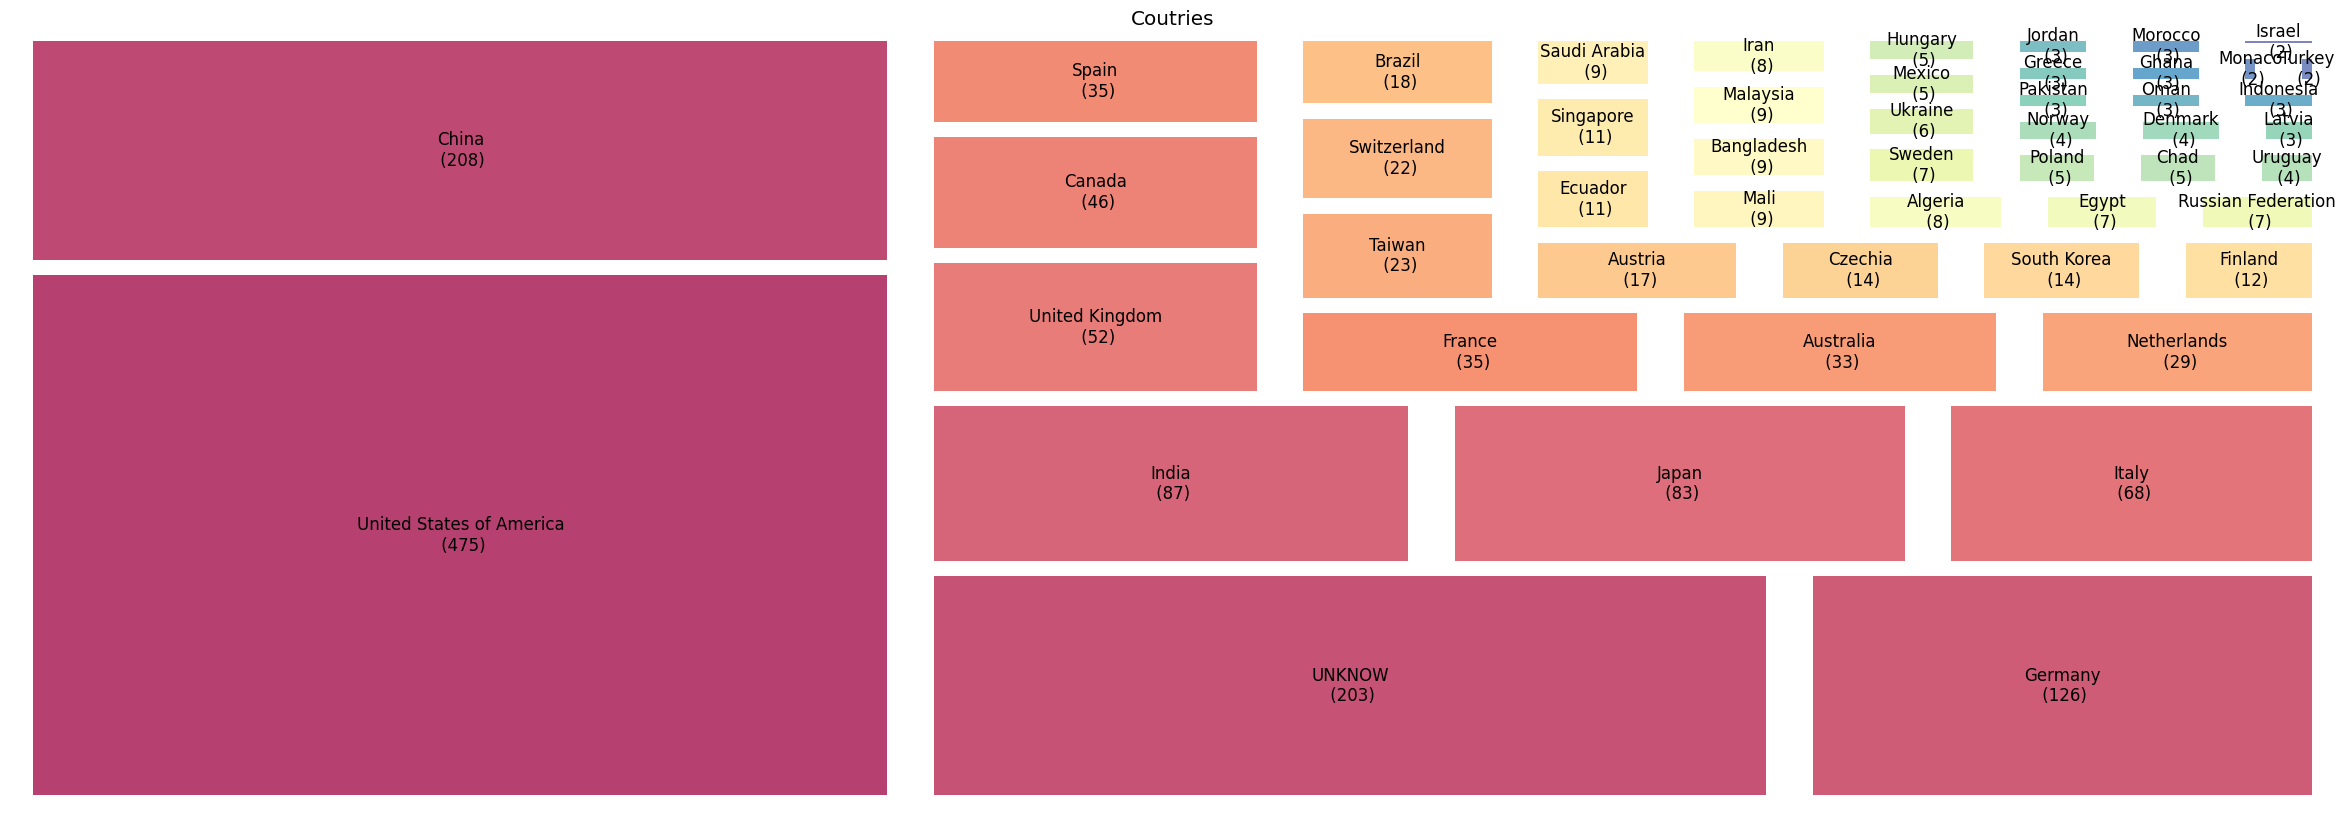

In [ ]:
bibfile.tree_map(entry = 'ctr', topn = 50, size_x = 30, size_y = 10, txt_font_size = 12)

## Tree Map: Keywords

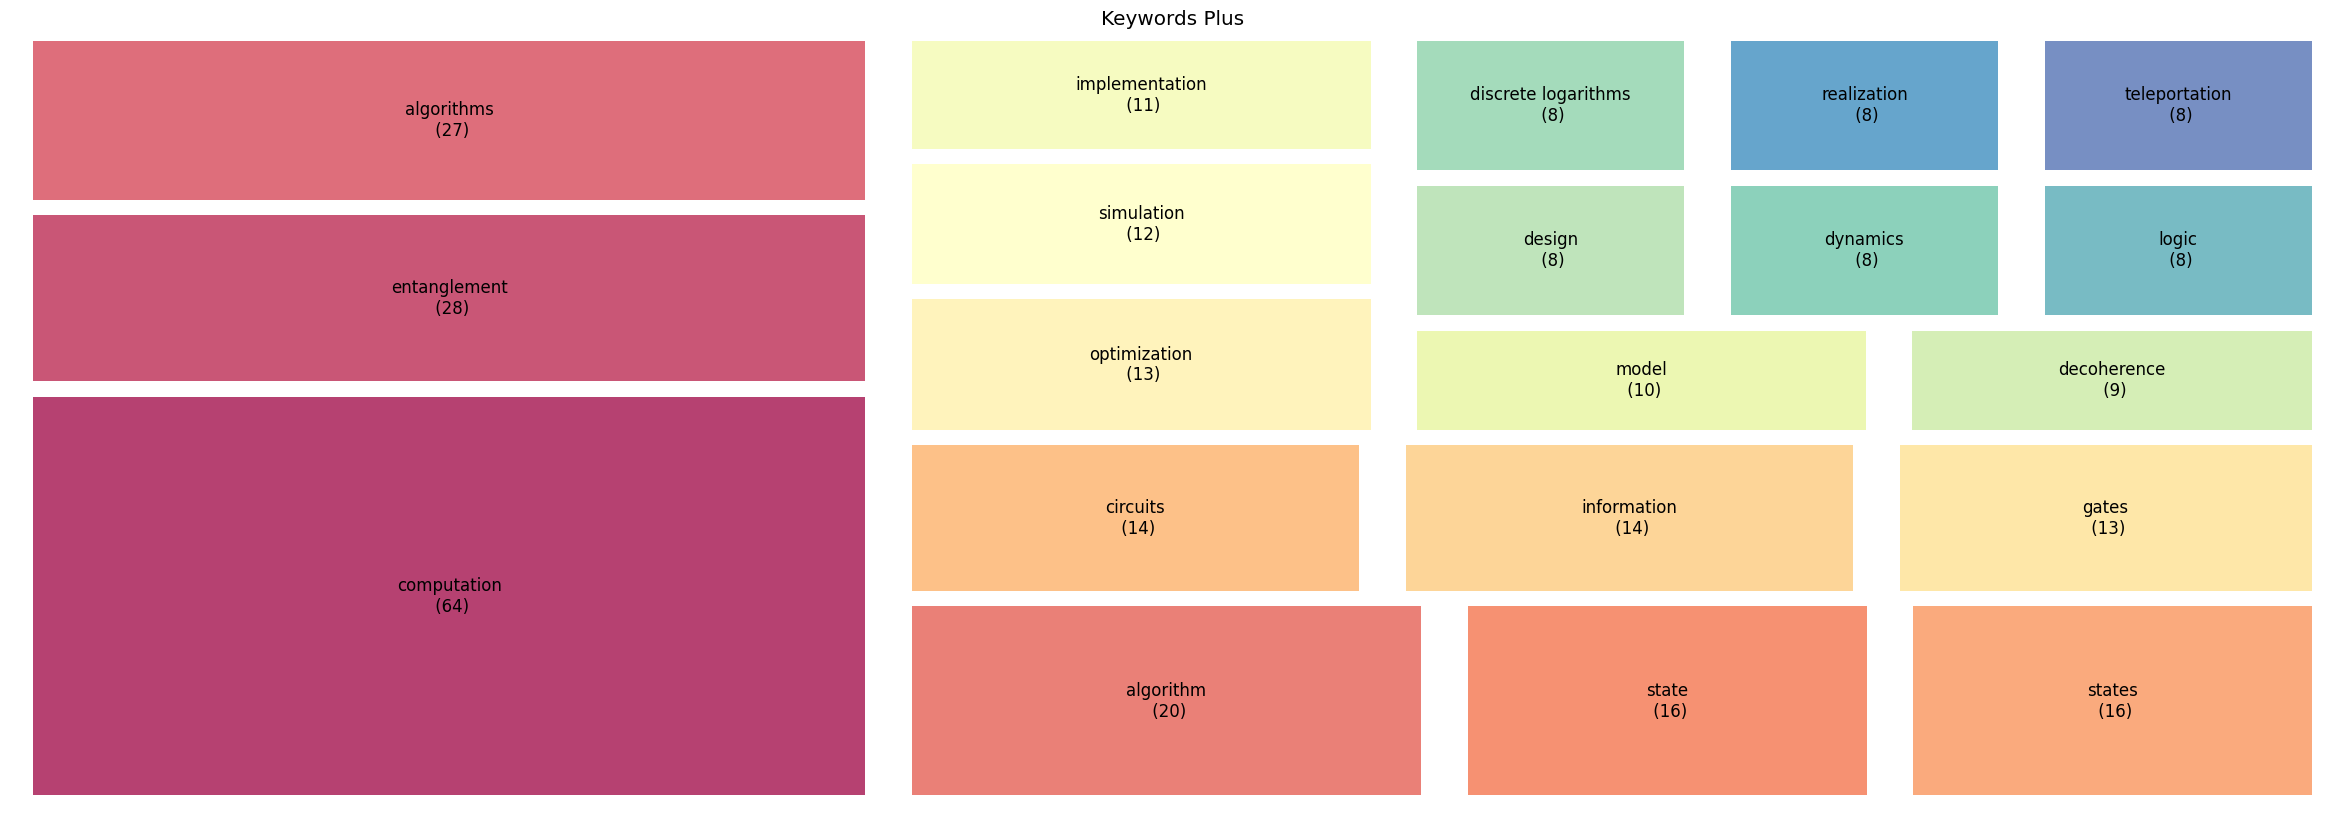

In [28]:
bibfile.tree_map(entry = 'kwp', topn = 20, size_x = 30, size_y = 10, txt_font_size = 12)

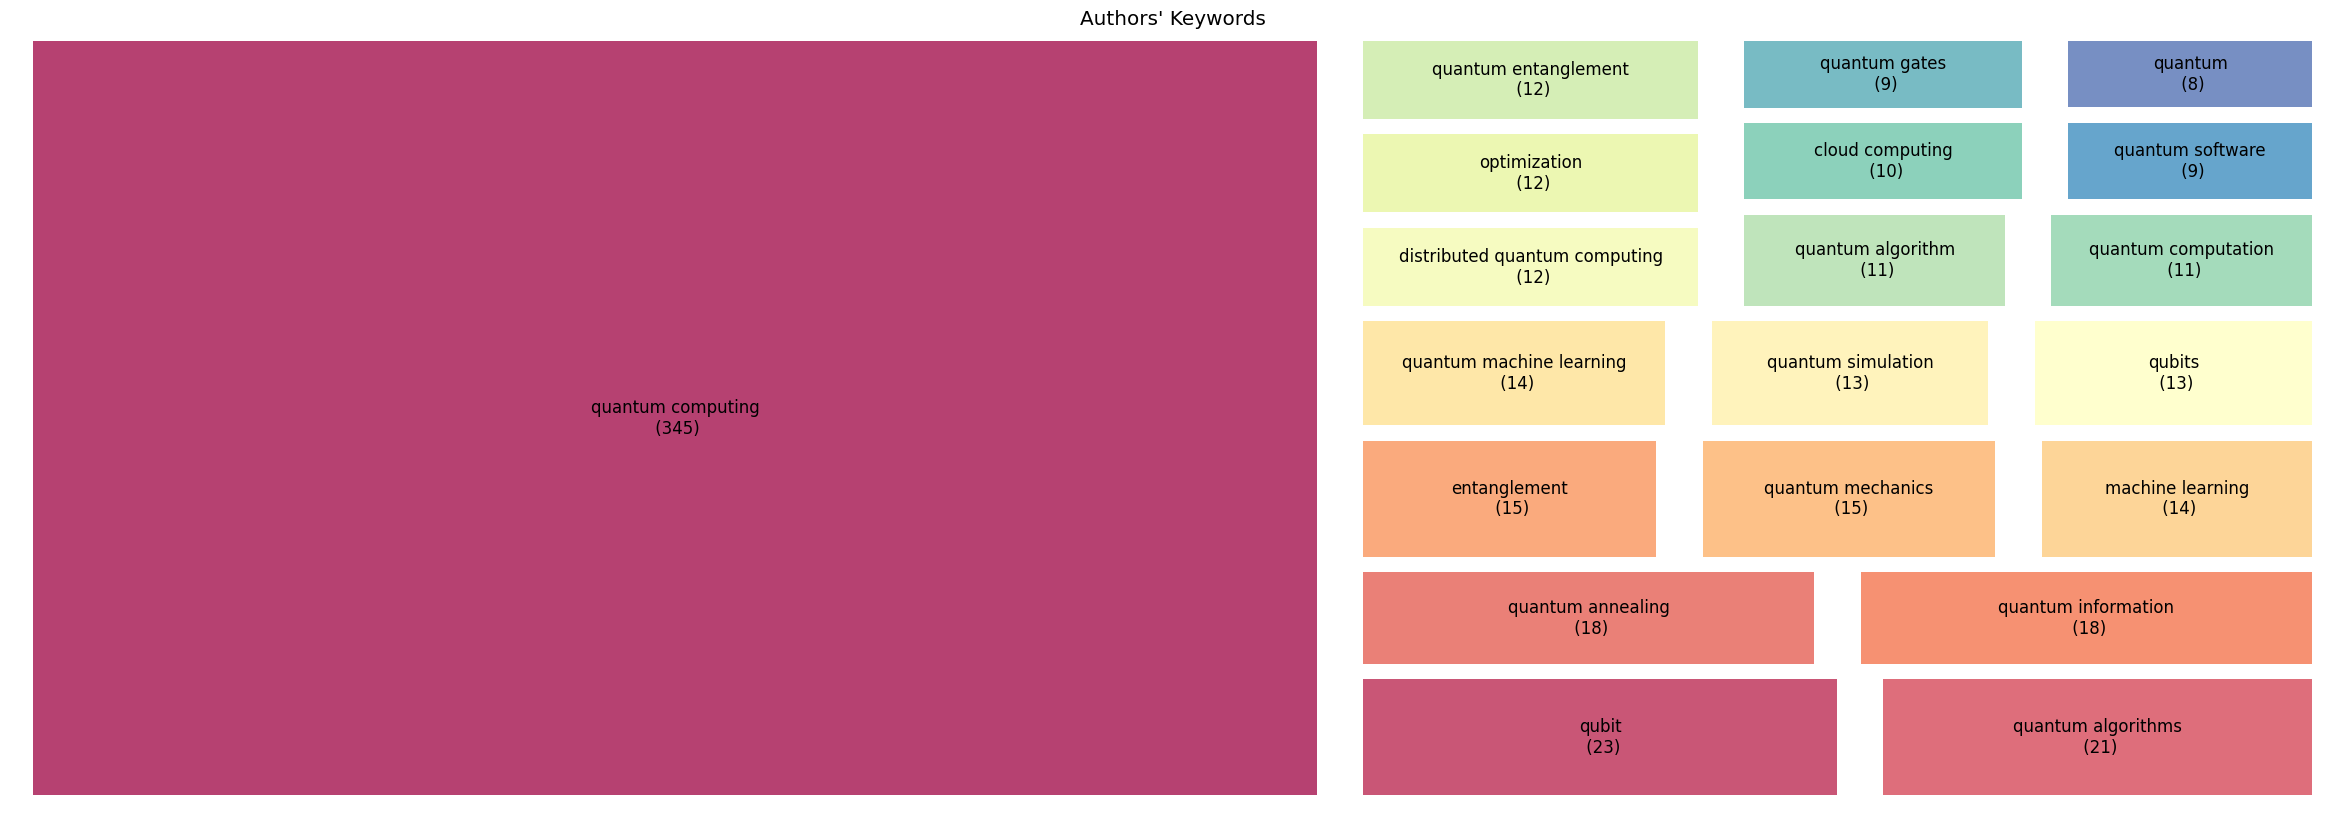

In [30]:
bibfile.tree_map(entry = 'kwa', topn = 20, size_x = 30, size_y = 10, txt_font_size = 12)

## Author Productivity

In [ ]:
bibfile.authors_productivity(view = 'notebook', topn = 20)

## Documents per year

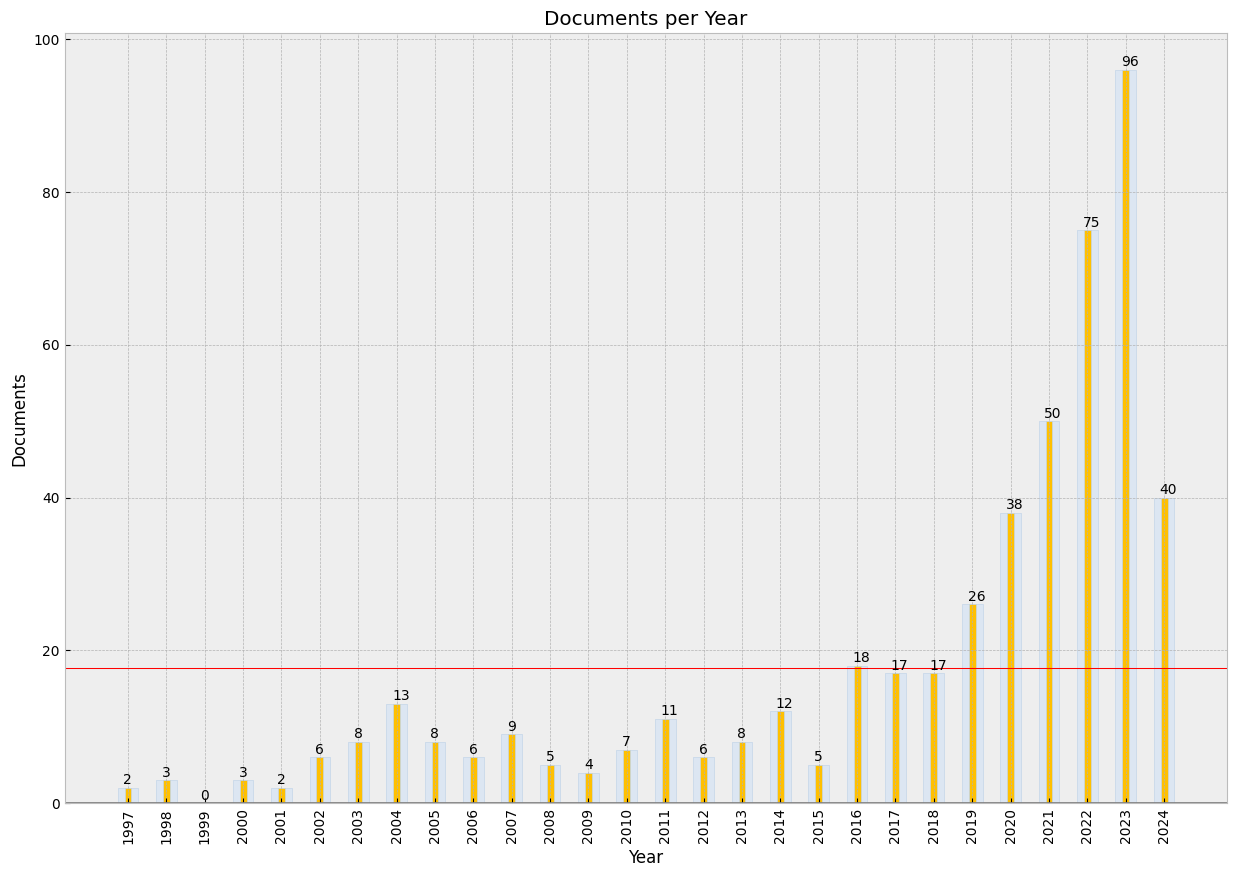

In [ ]:
bibfile.plot_bars(statistic = 'dpy', topn = 20, size_x = 15, size_y = 10)

## Top 10: Countries per Documents

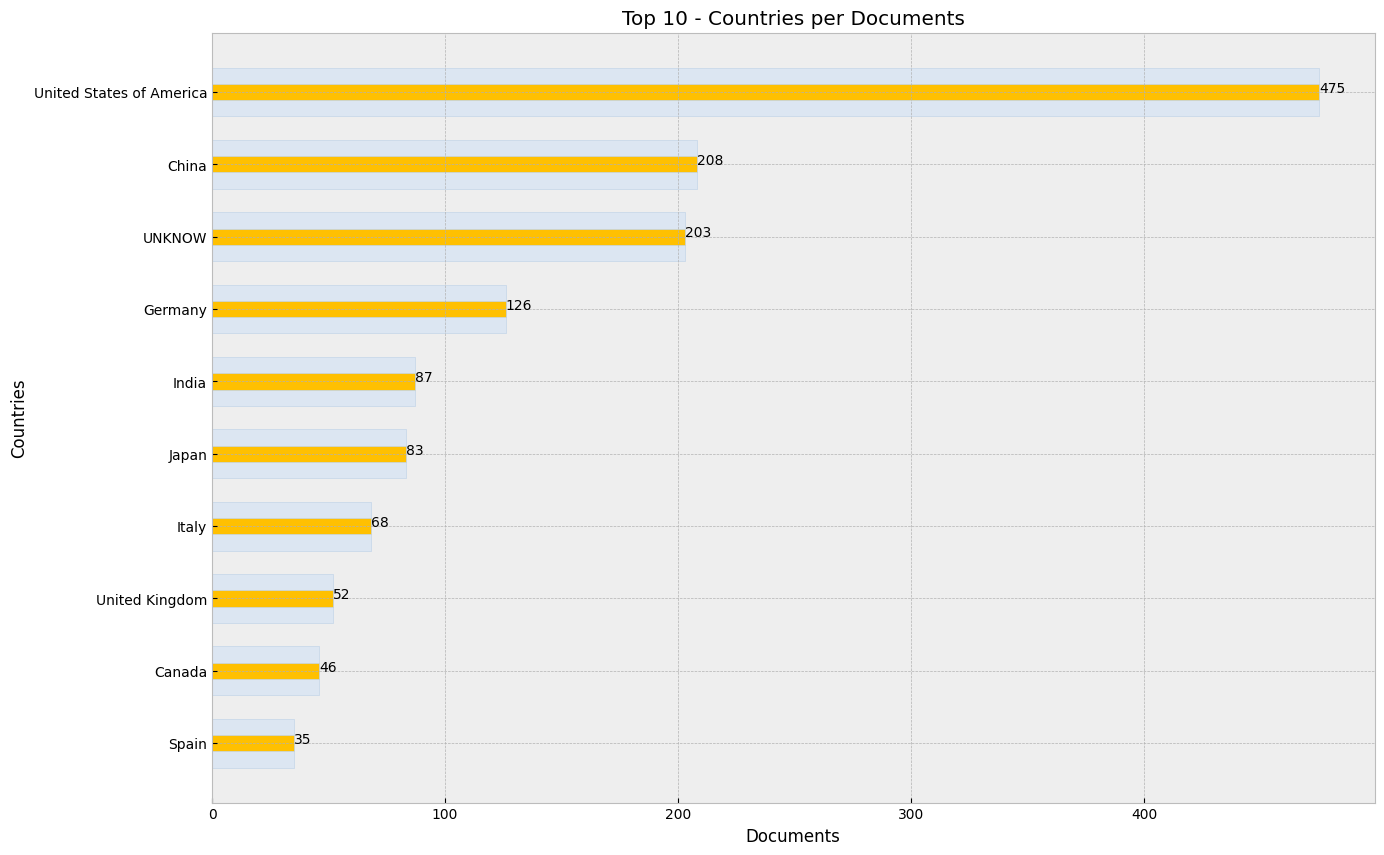

In [33]:
bibfile.plot_bars(statistic = 'cpd', topn = 10, size_x = 15, size_y = 10)

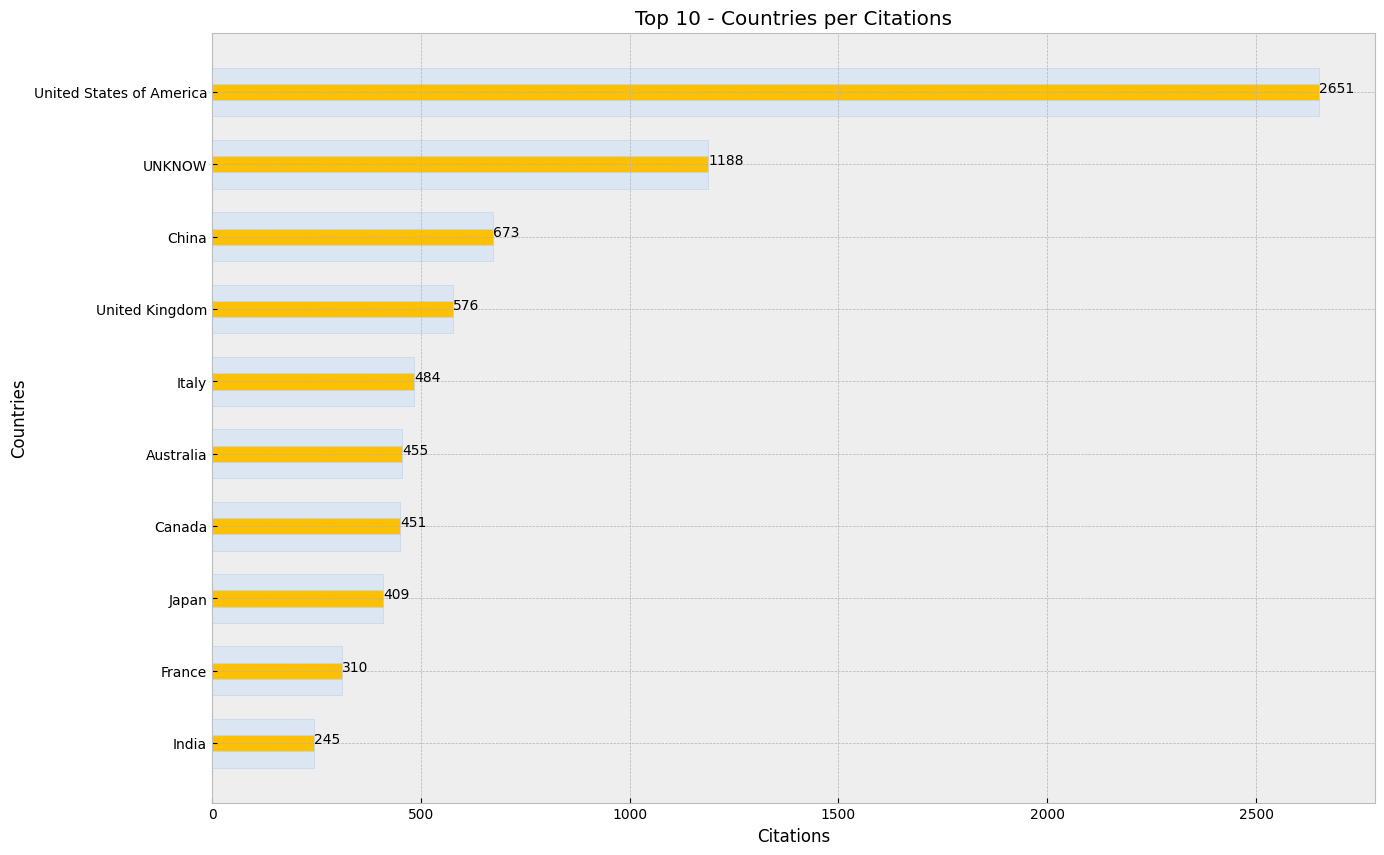

In [34]:
bibfile.plot_bars(statistic = 'cpc', topn = 10, size_x = 15, size_y = 10)

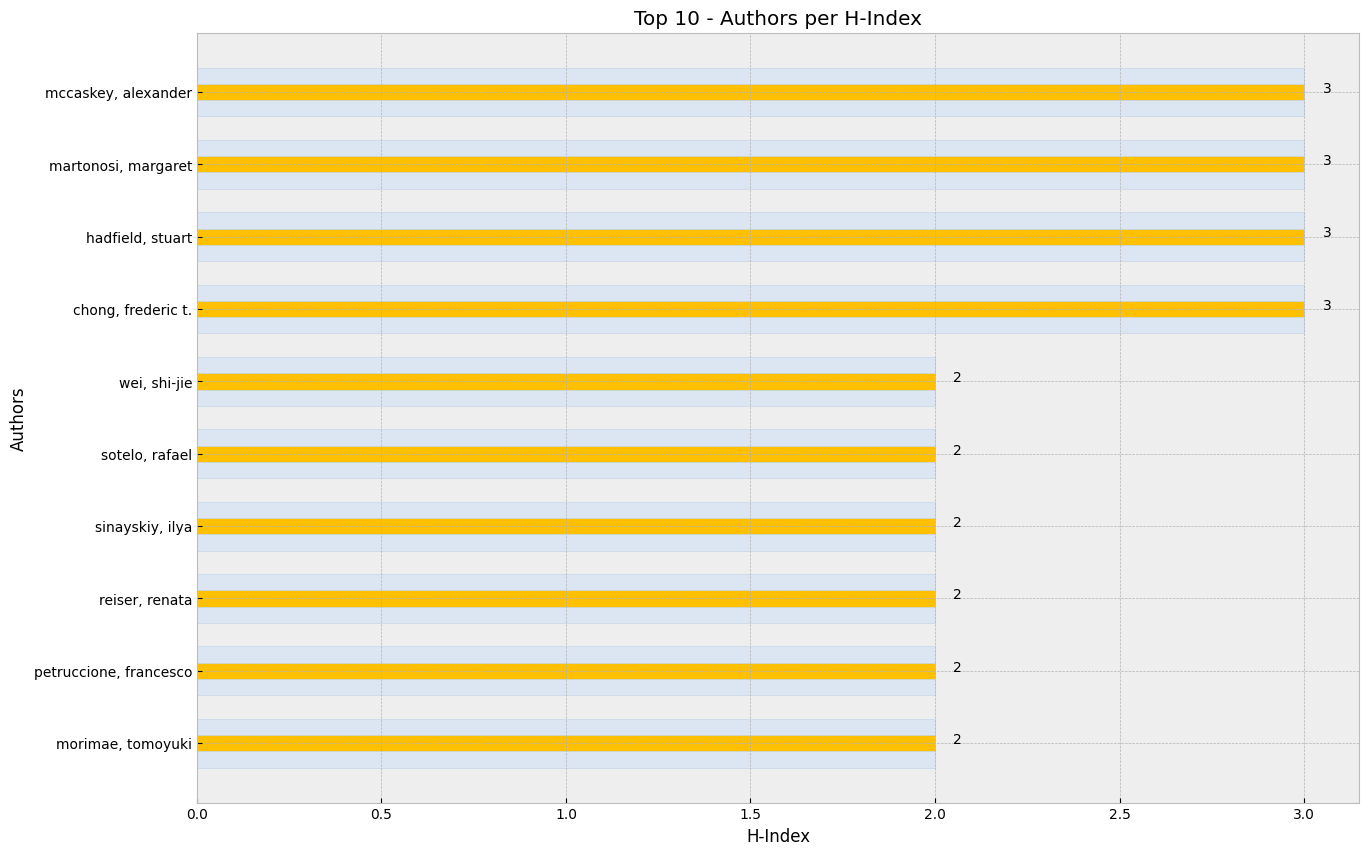

In [37]:
bibfile.plot_bars(statistic = 'aph', topn = 10, size_x = 15, size_y = 10)

## Collaboration analysis: authors

In [ ]:
bibfile.network_adj(view = 'notebook', adj_type = 'aut', min_count = 3, node_labels = True, label_type = 'name', centrality = None)

## similarity analysis

In [ ]:

bibfile.network_sim(view = 'notebook', sim_type = 'cocit', node_size = 10, node_labels = True, cut_coup = 0.3, cut_cocit = 10)

## Collaboration Analysis

In [ ]:
bibfile.network_adj_map(view = 'notebook', connections = True, country_lst = [])